In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
anos = [2019,2021,2022]

for ano in anos:
    df = pd.read_csv(f'situacaofinalalunos{ano}.csv', sep = ';')
    da = df.loc[(df['anoensino']=='9º ANO'), ['ano', 'nescolnome', 'ebairrnome', 'cescolrpae', 'anoensino', 'nturesnome', 'mat', 'alunosexo', 'esitaldesc']]
    da.to_csv('tabela9ano.csv', mode='a',sep = ';' , index=False)


In [5]:
df9ano = pd.read_csv('tabela9ano.csv', sep = ';')
df9ano

,ano,nescolnome,ebairrnome,cescolrpae,anoensino,nturesnome,mat,alunosexo,esitaldesc
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,APROVADO
8366,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,APROVADO
8367,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,APROVADO


In [6]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ano         8369 non-null   object
 1   nescolnome  8369 non-null   object
 2   ebairrnome  8369 non-null   object
 3   cescolrpae  8369 non-null   object
 4   anoensino   8369 non-null   object
 5   nturesnome  8369 non-null   object
 6   mat         8369 non-null   object
 7   alunosexo   8369 non-null   object
 8   esitaldesc  8369 non-null   object
dtypes: object(9)
memory usage: 588.6+ KB


<Axes: xlabel='ano'>

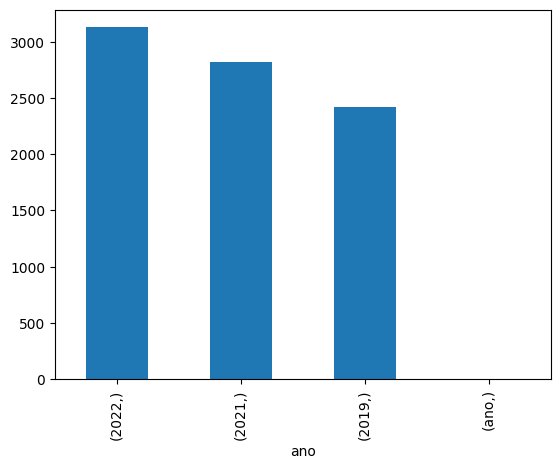

In [8]:
df9ano[['ano']].value_counts(normalize=False).plot(kind='bar')

A primeira análise tem que ser do ano, pra mostrar que ouve um crescimento no número dos alunos. Só falta colocar o ano em crescente.

# verificar pq o ano está aparecendo na tabela.